In [126]:
import json
import re
import random
from statistics import mode

In [127]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def analyze_correlation_and_plot(list_a, list_b):
    # 1. Compute Pearson correlation
    pearson_corr, _ = stats.pearsonr(list_a, list_b)

    # 2. Compute Spearman correlation
    spearman_corr, _ = stats.spearmanr(list_a, list_b)

    # 3. Compute Mean Squared Error (MSE)
    mse = np.mean((np.array(list_a) - np.array(list_b))**2)

    # Print results
    print(f"Pearson Correlation: {pearson_corr:.3f}")
    print(f"Spearman Correlation: {spearman_corr:.3f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")

    # 4. Scatter plot with best-fit line
    plt.figure(figsize=(5, 4))
    plt.scatter(list_a, list_b, color='blue', label='Data points')

    # Best fit line
    coefficients = np.polyfit(list_a, list_b, 1)  # Linear fit (degree=1)
    poly = np.poly1d(coefficients)
    best_fit_line = poly(list_a)

    plt.plot(list_a, best_fit_line, color='red', label='Best Fit Line')
    plt.xlabel('MOS (GT)')
    plt.ylabel('AudioJudge Prediction')
    plt.title('Scatter Plot with Best Fit Line')
    plt.legend()
    plt.grid()
    plt.show()
    


In [204]:
def read_output_file(path):
    # path = "../experiments/somos/pointwise/pointwise450_prompt1_ref.jsonl"
    outputs = []
    with open(path, "r") as f:
        for line in f:
            x = json.loads(line)
            outputs.append(x)
    
    preds, gts = [], []
    system_scores = {}
    for i in range
    error = 0
    for output in outputs:
        system_id = int(output['data']['uttId'].split('_')[-1])
        assert 0 <= system_id and system_id <= 200
        
        
        audio = output['data']
        judge_text = output['response']
    
        # Extract content between <summary> and </summary>
        verdict_match = re.search(r'<summary>(.*?)</summary>', judge_text, re.DOTALL)
        if verdict_match:
            verdict_text = verdict_match.group(1).strip() if verdict_match else None
        else:
            verdict_text = '999'
            error += 1
            
        num_match = re.search(r'\d+', verdict_text)
        if num_match:
            pred = float(num_match.group())  # Return the first matched number as a float
        else:
            pred = 999
            error += 1

        preds.append(pred)
        gts.append(audio['mos'])
    
    non_error_values = [x for x in preds if x != 999]
    # average = sum(non_error_values) / len(non_error_values)
    average = mode(non_error_values)
    preds = [average if x == 999 else x for x in preds]
    
    print("total:", len(outputs))
    print(f"Error: {error/len(outputs)*100:.2f}%")
    return gts, preds 

In [205]:
y = np.array(gts)

In [206]:
np.mean(y)

3.2413731178044904

In [207]:
# expected MSE for random guessing [1,5]
(1**2 + 2**2 + 3**2 + 4**2 + 5**2)/5 - (2*3*3.241) + 3.241**2

2.0580809999999996

total: 450
Error: 6.44%
Pearson Correlation: 0.077
Spearman Correlation: 0.067
Mean Squared Error (MSE): 0.8403


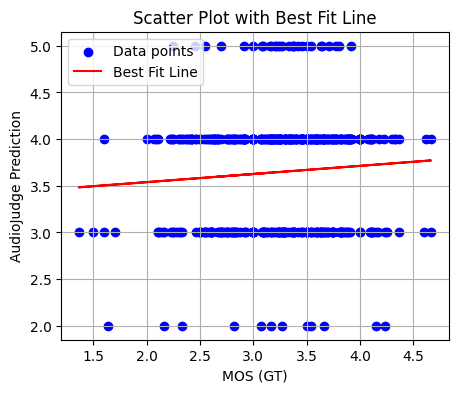

In [208]:
gts, preds = read_output_file("../experiments/somos/pointwise/pointwise450_prompt1_ref.jsonl")
analyze_correlation_and_plot(gts, preds)

In [209]:
np.mean(y**2) - (np.mean(y))**2

0.32140789468336095

total: 450
Error: 19.78%
Pearson Correlation: 0.167
Spearman Correlation: 0.136
Mean Squared Error (MSE): 0.7903


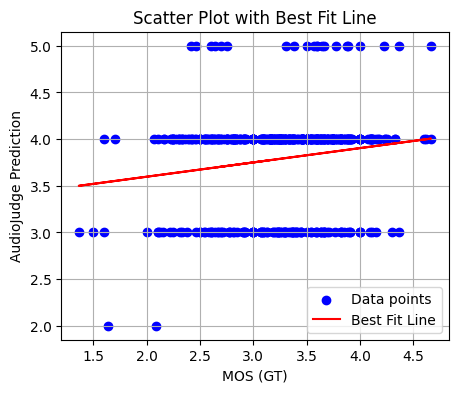

In [210]:
gts, preds = read_output_file("../experiments/somos/pointwise/pointwise450_prompt1_noref.jsonl")
analyze_correlation_and_plot(gts, preds)

In [211]:
np.mean(y**2) - (np.mean(y))**2

0.32140789468336095

total: 450
Error: 4.67%
Pearson Correlation: 0.191
Spearman Correlation: 0.130
Mean Squared Error (MSE): 1.9371


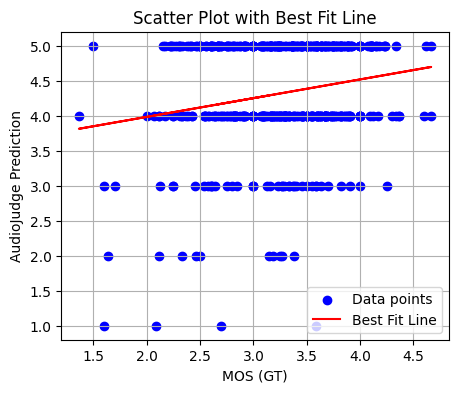

In [212]:
gts, preds = read_output_file("../experiments/somos/pointwise/pointwise450_prompt1_noref_icl.jsonl")
analyze_correlation_and_plot(gts, preds)

total: 450
Error: 24.00%
Pearson Correlation: 0.067
Spearman Correlation: 0.050
Mean Squared Error (MSE): 0.6425


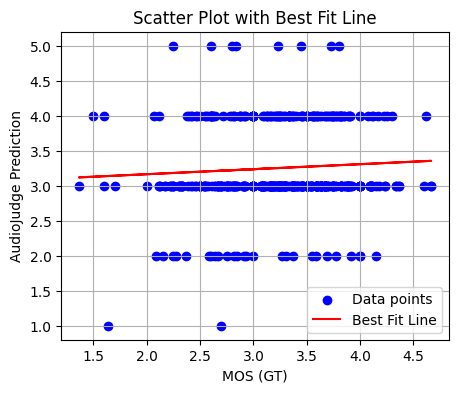

In [213]:
gts, preds = read_output_file("../experiments/somos/pointwise/pointwise450_prompt1_noref_icl234_ex1_reversed.jsonl")
analyze_correlation_and_plot(gts, preds)

# Whole dataset

total: 3000
Error: 16.97%
Pearson Correlation: 0.086
Spearman Correlation: 0.079
Mean Squared Error (MSE): 0.9170


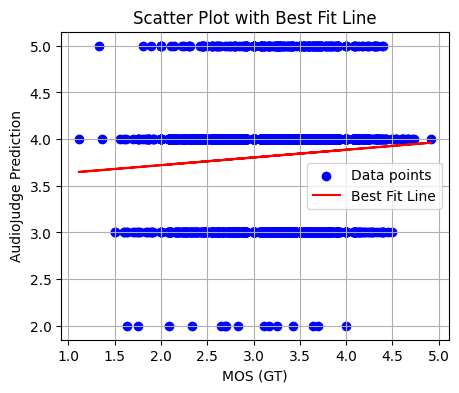

In [214]:
gts, preds = read_output_file("../experiments/somos/pointwise/pointwise_all_prompt1_noref.jsonl")
analyze_correlation_and_plot(gts, preds)